# Logistic Regression with Python

We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

We'll be trying to predict a classification- survival or deceased.
Let's begin by implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

## The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#printNo of passenger in orginal data set
#No of passenger Travel in Titatnic
#print("No of passanger:"+str(len(train.index)))
train.shape

(891, 12)

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Analizing The Data(Explore your Data set.)
- Check how one varrible is affetcing Others.
- Create the diffrent plot to check the relation ship between Varribles.
- We have various columns & we can plot the graph Between them.
- you can plot co-relation graph distributed graph it's depends upon you.

## 3. info()
Fetch some info about data by .info().<br>
The `info` helps you figure out the data types and the existence of empty values. 

In [5]:
print("Shape of data is :",train.shape)

Shape of data is : (891, 12)


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### 4. Fetch some info about numerical features by .describe()
`describe()`:

The describe will help you get all the statistical description of numerical columns. If you write the include parameter as object, it would describe the non-numerical columns. This is very useful method to grab a quick understanding on the data statistically.

#passanger who survived & who didnot survive
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

Result:
- 550 pasanger - Who did not survived 
- 350 passanger- who only surived 
there are very less survival rates.

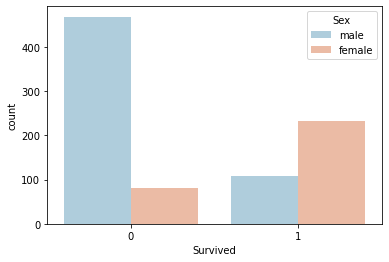

In [8]:
#Plot the Gender
# it Concludes the gender survival rates
#sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

Result: Majority of male didnot survive. & Majaority of female survive.

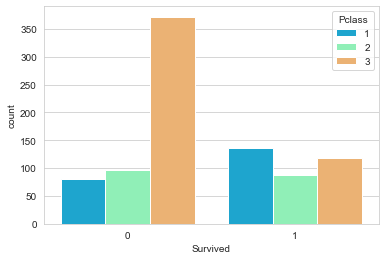

In [9]:
# Which Class of Passanger travelling in
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

REsult : 
- Pepole who survived belongs to higher class
- 3rd Class is cheapest class in Titanic.

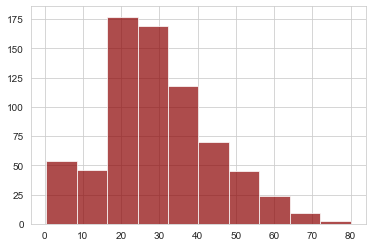

In [10]:
train['Age'].hist(bins=10,color='darkred',alpha=0.7)

Result: We can observe Most of the Younger Passanger & Avergae age of pepople is 20 to 40.

In [ ]:
#sns.distplot(train['Age'].dropna(),kde= False ,color='darkred',bins=30)

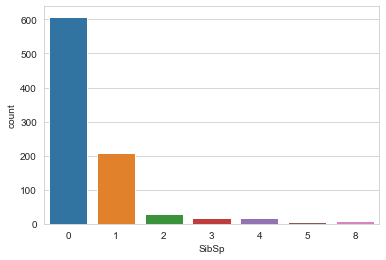

In [11]:
# Number of siblings
sns.countplot(x='SibSp',data=train)

Result:Max value is Zero. We can conclude that nethier the children nor a spouse on the titanic.

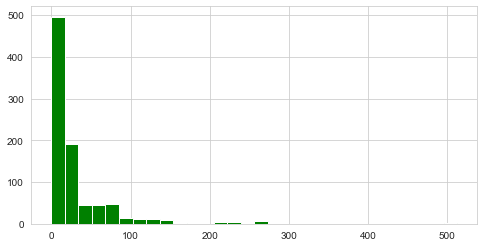

In [12]:
train['Fare'].hist(color='green',bins=30,figsize=(8,4))

# Data Wrangling
- if you have large data set, It may have some null values(NaN).
- It is very importent to remove unnessory feature from dataset.
- Removing Feature directly Can affect the accuracy.
- First remove Nan Values
### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [13]:
#check dataset null or not. it return boolean result.
#Print number of passanger who have null values.
train.isnull().sum()
#train.isnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

result:
- Maximum value is missing in cabin =687
- Very less in embarked

If you want to visulise it you have to use **heat map**. This makes a graph more Attractive. **Yellow** standes for True has value null.

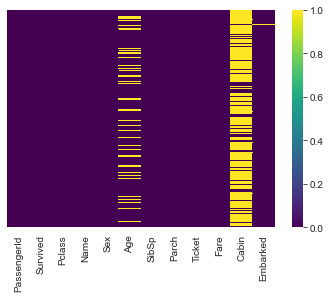

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')#cmap=color coding

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"



#### How to Remove the null values:
- We can put some dummies values.
- Drope the column.

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age` of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

**Imputation:** Fill the values against the Null values, This process is called imputation.

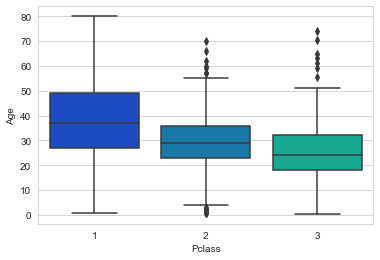

In [15]:
##plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [18]:
train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

**Result:** Class 1 & Class 2 passanger are older than Class 3. or

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [19]:
def impute_age(cols):
    Age = cols[0]
    #print(cols[0])
    Pclass = cols[1]
    #print( cols[1])
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
    

In [20]:
#Now apply that function!
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
#train['Age']

In [21]:
train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
#Now let's check that heat map again!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

WE can see here cabin has lot of null Values Then Drop the column.

In [22]:
train.drop('Cabin',axis=1,inplace=True)


In [23]:
# Used to show that perticular column has removed from data set or not
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


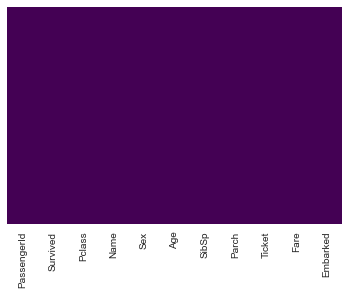

In [24]:
train.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False ,cmap='viridis')

Result: I have seen here there are no any null values.

In [25]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Here it says that Data set is clean. Means dataset doesnot conatin any null values. 

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We have to Convert this catagorical Values in order to calculate the **Logistic Regression**.

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [28]:
train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64

#### Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our **Machine learning** algorithm won't be able to directly take in those features as inputs.
Before Applying ML, We have insure that there is no string values in input varriable.

Using **String** We can not Predict any thing.

In [ ]:
#pd.get_dummies(train['Sex'])
#pd.get_dummies(train['Sex'],drop_first=True)

In [ ]:
#pd.get_dummies(train['Embarked'])
#pd.get_dummies(train['Embarked'],drop_first=True)

In [29]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head(2)

,male
0,1
1,0


In [30]:
pcl = pd.get_dummies(train['Pclass'],drop_first=True)
pcl.head(11)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
5,0,1
6,0,0
7,0,1
8,0,1
9,1,0


In [ ]:
train['Pclass']

In [31]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [32]:
embark.head(2)

,Q,S
0,0,1
1,0,0


In [33]:
train = pd.concat([train,sex,embark,pcl],axis=1)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [34]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
#You can drop the Passanger class also

In [35]:
train.drop(['Pclass'],axis=1,inplace=True)

In [36]:
train.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1


#### Great! Our data is ready for our model!

### Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

#### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X=train.drop('Survived',axis=1) # Feature Extraction
X

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,0
888,24.0,1,2,23.4500,0,0,1,0,1
889,26.0,0,0,30.0000,1,0,0,0,0


In [40]:
y=train['Survived'] # Label
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

In [42]:
X_train.head()
X_test.head()
y_train.head()
y_test.head()

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

### Training and Predicting

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

Let's move on to evaluate our model!

#### Evaluation
We can check precision,recall,f1-score using classification report!

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[150,  13],
       [ 33,  71]], dtype=int64)

# Accuracy Check
Calculate the accuracy to check how Accurate ur result are.

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8277153558052435

##### Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file.

## Thank You!